# PEC 2 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2023/2024

VICENTE VILLAGRASA, DIEGO

### EMAIL ALUMNO:

diegovicentevillagrasa@gmail.com

#### Uso de Datasets en la PEC2

En esta práctica, se deben utilizar los datasets que se especifiquen en los ejercicios del Conjunto 2, 3 y 4 (preguntas 4 a 12). Utilice datasets a elección del alumno en las preguntas 1, 2 y 3.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Conjunto 1

In [2]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

### Pregunta 1

Evalúa al menos 3 modelos de clasificación supervisada (SVC, Regresor Logístico, KNN Classifier... por ejemplo) con distintos repartos de train-test y haciendo Cross-Validation sobre ellos. Busca una combinación de hiperarámetros óptima para cada uno de ellos para distintos test_sizes entre 0.1 y 0.4. Razonar cual sería el modelo que mejor generaliza los resultados, entre los entrenamientos realizados.

Primero es necesario importar los paquetes necesarios relacionados con los modelos, normalizadores, métricas y demás métodos que se van a usar en el ejercicio:

In [23]:
# Paquetes necesarios 

# Modelos
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Normalizador
from sklearn.preprocessing import StandardScaler

# Tratado de datos y de modelo
from sklearn.model_selection import train_test_split, GridSearchCV

# Métrica
from sklearn.metrics import accuracy_score

# Separación de datos
data = wine.data
target = wine.target

Ahora se procederá a crear un bucle que busca la mejor combinación de parámetros para cada modelo, teniendo unos tamaños de test y train diferentes. Los pasos para construir este bucle son los siguientes:

- Crear una lista que contenga un rango de valores de 0.1 a 0.4, que representa el tamaño del split de test, que cambiará 4 veces en cada modelo para encontrar el más óptimo.

- Crear una lista que contenga el nombre de los métodos que contienen los modelos que se quieran utilizar, en este caso SVC, LogisticRegression, KNeighborsClassifier.

- Crear el bucle for, que será uno doble. Recorrerá la lista de modelos, y para cada modelo recorrerá la lista del rango de test_size. Es decir, para cada modelo el bucle se ejecutará 4 veces.

- El segundo bucle se encarga de realizar el entrenamiento y análisis de los diferentes modelos entrenados. Primero, se realiza la separación de la base de datos en train y test, usando el método $train$_ $test$_ $split$. El tamaño del test_size variará de 0.1 a 0.4 a lo largo de los 4 bucles. Después se normalizarán los conjuntos de X_train y X_test. A continuación se creará el objeto $param$_$grid$ el cuál se encarga de guardar todos los parámetros que se quieren usar en los modelos más adelante.

- Ahora se tendrán que crear tres condicionales, siendo cada uno un modelo (SVC, LogisticRegression, KNeighborsClassifier). Esto es necesario porque los parámetros son diferentes en cada modelo. Dentro de cada condicional $if$ se modificará el objeto $param$_$grid$ con los parámetros necesarios para cada modelo. Aparte, se inicializa el modelo en el objeto $md$.

- Posterior a esto, se creará un objeto $GridSearchCV$, el cuál encontrará el mejor modelo posible dados los datos incluidos, en este caso, los parámetros, el número de cross validations que se quiere realizar, en este caso 10, y el tipo de métrica que se quiere utilizar, en este caso la precisión. Tras la creación del objeto, se puede realizar un fit sobre el mismo. Tras un tiempo de procesamiento, ya se puede acceder a los resultados utilizando las funciones grid_search.best_params_ o grid_search.best_estimator_.

- El último paso es hacer que el modelo haga predicciones sobre el conjunto de test, y comparar estos resultados con la función $accuracy$_ $score$. Después de esto, se muestra por pantalla los resultados de cada modelo.

In [26]:
# Rango de test_sizes
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Lista de modelos
models = ["SVC", "LogisticRegression", "KNeighborsClassifier"]

# Ciclo a través de modelos
for model in models:
    print(f"Modelo: {model}")

    for test_size in test_sizes:
        # División de datos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size)

        # Normalizacion de datos
        scalerTrained = StandardScaler().fit(X_train)
  
        X_train_scaled = scalerTrained.transform(X_train)
        X_test_scaled  = scalerTrained.transform(X_test)
        
        # Parámetros para la búsqueda de hiperparámetros
        param_grid = {}

        if model == 'SVC':
            param_grid = {'C': [0.1, 0.2, 0.5, 1, 10, 20],
                          #'kernel': ['linear', 'poly', 'rbf'], No se incluye porque tarda mucho en procesar 
                          'degree': [2, 3, 4],
                          'coef0': [0.0, 0.1, 0.5],
                          'gamma': ["scale", "auto", 1, 5, 10],
                          'shrinking': [True, False],
                          'probability': [True, False]}
            md = SVC()
            
        elif model == 'LogisticRegression':
            param_grid = {'C': [0.1, 0.2, 0.5, 1, 10, 20],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'warm_start': [True, False],
                          'max_iter': [50, 100, 200],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'fit_intercept': [True, False],
                          'solver': ['liblinear', 'lbfgs']}
            md = LogisticRegression()
    
        elif model == 'KNeighborsClassifier':
            param_grid = {'n_neighbors': [3, 5, 7, 10], 
                          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                          'leaf_size': [20, 30, 40],
                          'weights': ['uniform', 'distance'],
                          'metric': ['euclidean', 'manhattan', 'minkowski'],
                          'p': [1, 2]}
            md = KNeighborsClassifier()

        # Búsqueda de hiperparámetros
        grid_search = GridSearchCV(md, param_grid, cv=10, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)

        # Mejores hiperparámetros
        best_params = grid_search.best_params_

        # Modelo con mejores hiperparámetros
        best_model = grid_search.best_estimator_

        # Predicciones en el conjunto de prueba
        y_pred = best_model.predict(X_test_scaled)

        # Evaluación del modelo
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Test Size: {test_size}, Mejores Parámetros: {best_params}, Accuracy: {accuracy}")

    print("\n")

print("Búsqueda de modelos finalizada")

Modelo: SVC
Test Size: 0.1, Mejores Parámetros: {'C': 1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'probability': True, 'shrinking': True}, Accuracy: 1.0
Test Size: 0.2, Mejores Parámetros: {'C': 1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'probability': True, 'shrinking': True}, Accuracy: 0.9722222222222222
Test Size: 0.3, Mejores Parámetros: {'C': 0.5, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'probability': True, 'shrinking': True}, Accuracy: 1.0
Test Size: 0.4, Mejores Parámetros: {'C': 0.5, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'probability': True, 'shrinking': True}, Accuracy: 0.9861111111111112


Modelo: LogisticRegression
Test Size: 0.1, Mejores Parámetros: {'C': 1, 'fit_intercept': True, 'max_iter': 50, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs', 'warm_start': True}, Accuracy: 1.0
Test Size: 0.2, Mejores Parámetros: {'C': 0.2, 'fit_intercept': True, 'max_iter': 50, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs', 'warm_start': True}, Ac

Tras la búsqueda de los modelos óptimos, el modelo que es capaz de generalizar más sobre los datos utilizados es el Logistic Regression, ya que ha obtenido un puntaje del 100% en todas sus iteraciones. Los parámetros son algo diferentes entre iteraciones, aunque no hay cambios muy grandes entre un modelo y otro. 

Como parámetros ideales, nos podríamos quedar con los siguientes:

- Test_size: Para no caer en underfitting o overfitting, se debería de elegir entre un 0.2 a 0.3 de tamaño de test size.
- C: De 0.1 a 0.2
- Fit_intercept: True
- Max_iter: 50
- Multi_class: auto / ovr
- Penalty: l2
- Solver: lbfgs
- Warm_start: True

Como en todas las ocasiones, hay que tener en cuenta que estos resultados se han obtenido usando unos datos concretos. Para cada ocasión habrá que evaluar cuales son las mejores opciones, ya que no siempre es igual.

### Pregunta 2

Realiza al menos 2 transformaciones de reducción de dimensionalidad sobre el Dataset utilizando un mismo algoritmo (p.e. PCA). Evalúe las diferencias de entrenar un modelo de clasificación (como los utilizados al principio de la PEC2) con todo el Dataset, o con el Dataset reducido a diferentes dimensiones. Graficar los resultados y evaluar el tiempo de computación de entrenamiento de modelos. No olvides el efecto de escalar los datos previamente a aplicar el PCA. Justificar los resultados encontrados.

Graficar los resultados y comentar las diferencias de entrenar y evaluar el modelo sobre el Dataset transformado con sus dimensiones reducidas. Ejecuta diferentes visualizaciones de los datos tratados.

El primer paso es importar todos los paquetes necesarios, que en este caso son los siguientes:

In [103]:
# Normalizador
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# Tratado de datos y de modelo
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.neighbors import KNeighborsClassifier

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

# Separación de datos
data = wine.data
target = wine.target

Ahora se podrá comenzar a realizar pruebas alrededor del PCA. Primero, se va a realizar PCA a la base de datos wine sin normalizar, para ver el efecto que tiene.

Para ello, primero se va a separar el dataset en conjuntos de train y test, y posteriormente se realizará el PCA. Luego se entrenará un modelo KNN, y se evaluará su rendimiento con métricas de $accuracy$, $precision$ y $recall$. Aparte, se medirá el tiempo que tarda el equipo en entrenar al modelo:

In [122]:
# PCA sin normalizar

# Se separa el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(data, target) 

# Se inicializa el objeto PCA
pca = PCA(n_components=7) 

# Se hace PCA sobre el conjunto de test y train
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Se entrena el modelo KNN calculando el tiempo que tarda
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
end_time = time.time()

# Se evalua el modelo KNN con las métricas de accuracy, precision y recall
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Modelo KNN con datos sin normalizar y PCA:","\n",
      f"Accuracy:{accuracy}","\n",
      f"Precision:{precision}","\n",
      f"Recall:{recall}","\n",
      f"Time:{end_time - start_time}s")

Modelo KNN con datos sin normalizar y PCA: 
 Accuracy:0.6666666666666666 
 Precision:0.6662177328843996 
 Recall:0.6666666666666666 
 Time:0.0010037422180175781s


A continuación se realizará el mismo proceso, pero normalizando (usando un $StandardScaler$), para ver que efecto tiene sobre el PCA:

In [126]:
# PCA normalizando

# Se separa el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(data, target)

# Se normalizan los datos
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Se inicializa el objeto PCA
pca = PCA(n_components=7)

# Se hace PCA sobre el conjunto de test y train normalizados
X_train_norm_pca = pca.fit_transform(X_train_norm)
X_test_norm_pca = pca.transform(X_test_norm)

# Se entrena el modelo KNN calculando el tiempo que tarda
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_norm_pca, y_train)
end_time = time.time()

# Se evalua el modelo KNN con las métricas de accuracy, precision y recall
y_pred = knn.predict(X_test_norm_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Modelo KNN con datos normalizados y PCA dejando 7 componentes:","\n",
      f"Accuracy:{accuracy}","\n",
      f"Precision:{precision}","\n",
      f"Recall:{recall}","\n",
      f"Time:{end_time - start_time}s")

Modelo KNN con datos normalizados y PCA dejando 7 componentes: 
 Accuracy:0.9333333333333333 
 Precision:0.9433333333333334 
 Recall:0.9333333333333333 
 Time:0.0010056495666503906s


Por último, para evaluar completamente el método PCA, se va a cambiar el número de componentes con los que se queda de 7 a 5, para poder observar que efecto tiene sobre el modelo knn:

In [128]:
# PCA normalizando
X_train, X_test, y_train, y_test = train_test_split(data, target)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Se cambia el n_components de 7 a 5
pca = PCA(n_components=5)

X_train_norm_pca = pca.fit_transform(X_train_norm)
X_test_norm_pca = pca.transform(X_test_norm)

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_norm_pca, y_train)
end_time = time.time()

y_pred = knn.predict(X_test_norm_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Modelo KNN con datos normalizados y PCA dejando 5 componentes:","\n",
      f"Accuracy:{accuracy}","\n",
      f"Precision:{precision}","\n",
      f"Recall:{recall}","\n",
      f"Time:{end_time - start_time}s")

Modelo KNN con datos normalizados y PCA dejando 5 componentes: 
 Accuracy:0.9555555555555556 
 Precision:0.9591630591630592 
 Recall:0.9555555555555556 
 Time:0.0010042190551757812s


### Pregunta 3

Utiliza Árboles de Decisión para graficar los parámetros más importantes del dataset escogido. Crea distintos árboles modificando los parámetros de modelo más importantes (como p.e. el max_depth, min_samples_leaf... y otros)

Graficar los resultados de al menos 4 árboles, optimizando distintos tipos de parámetros

Antes de hacer nada hay importar todos los paquetes necesarios:

In [3]:
# Codificación de target a valores numéricos
from sklearn.preprocessing import LabelEncoder

# Train test split
from sklearn.model_selection import train_test_split

# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier

# Métricas
from sklearn.metrics import classification_report, confusion_matrix

# Visualización de los árboles de decisión
from sklearn.tree import plot_tree

# Paquete para realizar gráficas
import seaborn as sns

El primer paso tras el importado de paquetes es el procesado de las etiquetas de cada elemento del dataset. En este caso, la etiqueta se refiere al tipo de vino que es. Estos targets pueden tomar el valor de 0, 1 y 2.

En otros casos, el target pueden ser palabras, pero hay que tener en cuenta que para poder realizar arboles de decisión el target tiene que ser numérico. Para cambiar de un valor de texto a numérico hay que usar el método $LabelEncoder$, que es capaz de pasar las clases del dataset de texto a valores numéricos.

Se va a realizar el proceso aunque en este caso los targets ya son numéricos. Es decir, no habrá ninguna diferencia en los targets que ya se tienen con los que se van a conseguir gracias al $LabelEncoder$.

Para este proceso primero se creará un DataFrame Pandas del dataset que se esté utilizando, en este caso el de vinos de Scikit Learn. Después se añadirá una columna nueva, donde se incluirán los targets, y se rellenarán con dichos datos. A continuación se creará la variable $target$, que contiene los datos de la columna recientemente creada.

Ahora se podrá crear el objeto le, que contiene el $LabelEncoder$. Por último, se actualizará el objeto target con lo que devuelve el $LabelEncoder$ pasando target como parámentro. Esta línea es la que se encargaría de cambiar los targets de texto a número.

In [5]:
# Creación del dataframe
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Creación de una nueva columna que contiene los targets
wine_df['target'] = wine.target

# Creación de la variable target
target = wine_df['target']

# Uso del LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)

El siguiente paso es realizar el split de los datos con el método $train$_ $test$_ $split$. Después de esto ya se puede crear el árbol de decisión con el método $DecisionTreeClassifier$. Para este primer caso, no se va a cambiar ningúno de sus parámetros, para posteriormente comparar su rendimiento cuando se cambien los parámetros.

Después de entrenar el arbol de decisión, se procede a evaluar los resultados. Este proceso de evaluación comienza sacando las predicciones del modelo sobre el conjunto de prueba, usando el método $predict$ sobre el arbol de decisión. Después, se usará la función $classification$_ $report$, usando el conjunto de test y las predicciones. Esto devolverá un reporte completo con todo tipo de estadísticas para comprobar el rendimiento del modelo:

In [18]:
# Split de los datos
X_train, X_test, y_train, y_test = train_test_split(wine.data , target)

# Creación del arbol de decisión con parámetros predeterminados
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Predicción del árbol de decisión creado con el conjunto de prueba
y_pred = dtree.predict(X_test)

# Resultado de la predicción
print("Resultado del arbol de decisión - \n", classification_report(y_test,y_pred))

Resultado del arbol de decisión - 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.89      0.89      0.89        18
           2       1.00      0.90      0.95        10

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.92        45
weighted avg       0.91      0.91      0.91        45



Los resultados son positivos, aunque mejorables. La clase 2 es la que mejor se predice, mientras que la 0 y la 1 se predicen algo peor. Son buenos resultados, pero tal vez cambiando parámetros se puede mejorar el modelo.

Aparte del reporte anterior, también se va a graficar la matriz de confusión, que va a permitir visualizar en que está acertando y fallando el modelo. Para crear la matriz de confusión, se va a usar el método $confusion$_ $matrix$. Posteriormente, se va a graficar la matriz de confusión utilizando seaborn como se puede observar a continuación:

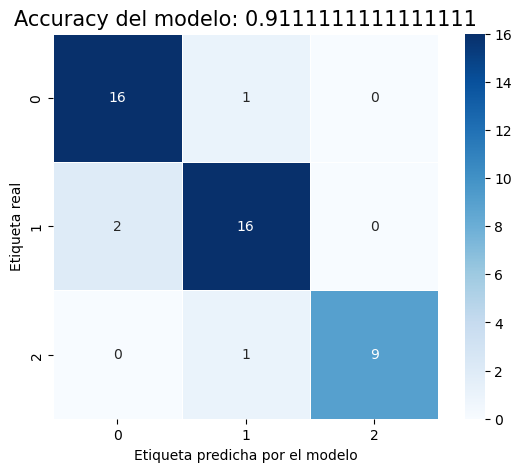

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

all_sample_title = 'Accuracy del modelo: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()

Como se podía esperar por las estadísticas antes vistas, los resultados son bastante buenos. Se puede observar que el modelo ha predicho una vez la clase 1 cuando realmente era la clase 0, dos veces la clase 0 cuando era la clase 1, y una vez la clase 1 cuando era la clase 2.

Por último, se va a visualizar el árbol de decisión gráficamente. Esto permite visualizar que pasos ha seguido el modelo para llevar a cabo sus decisiones. Para ello, se va a utilizar el método $plot$_ $tree$, incluyendo diferentes parámetros que permite cambiar el estilo visual del gráfico:

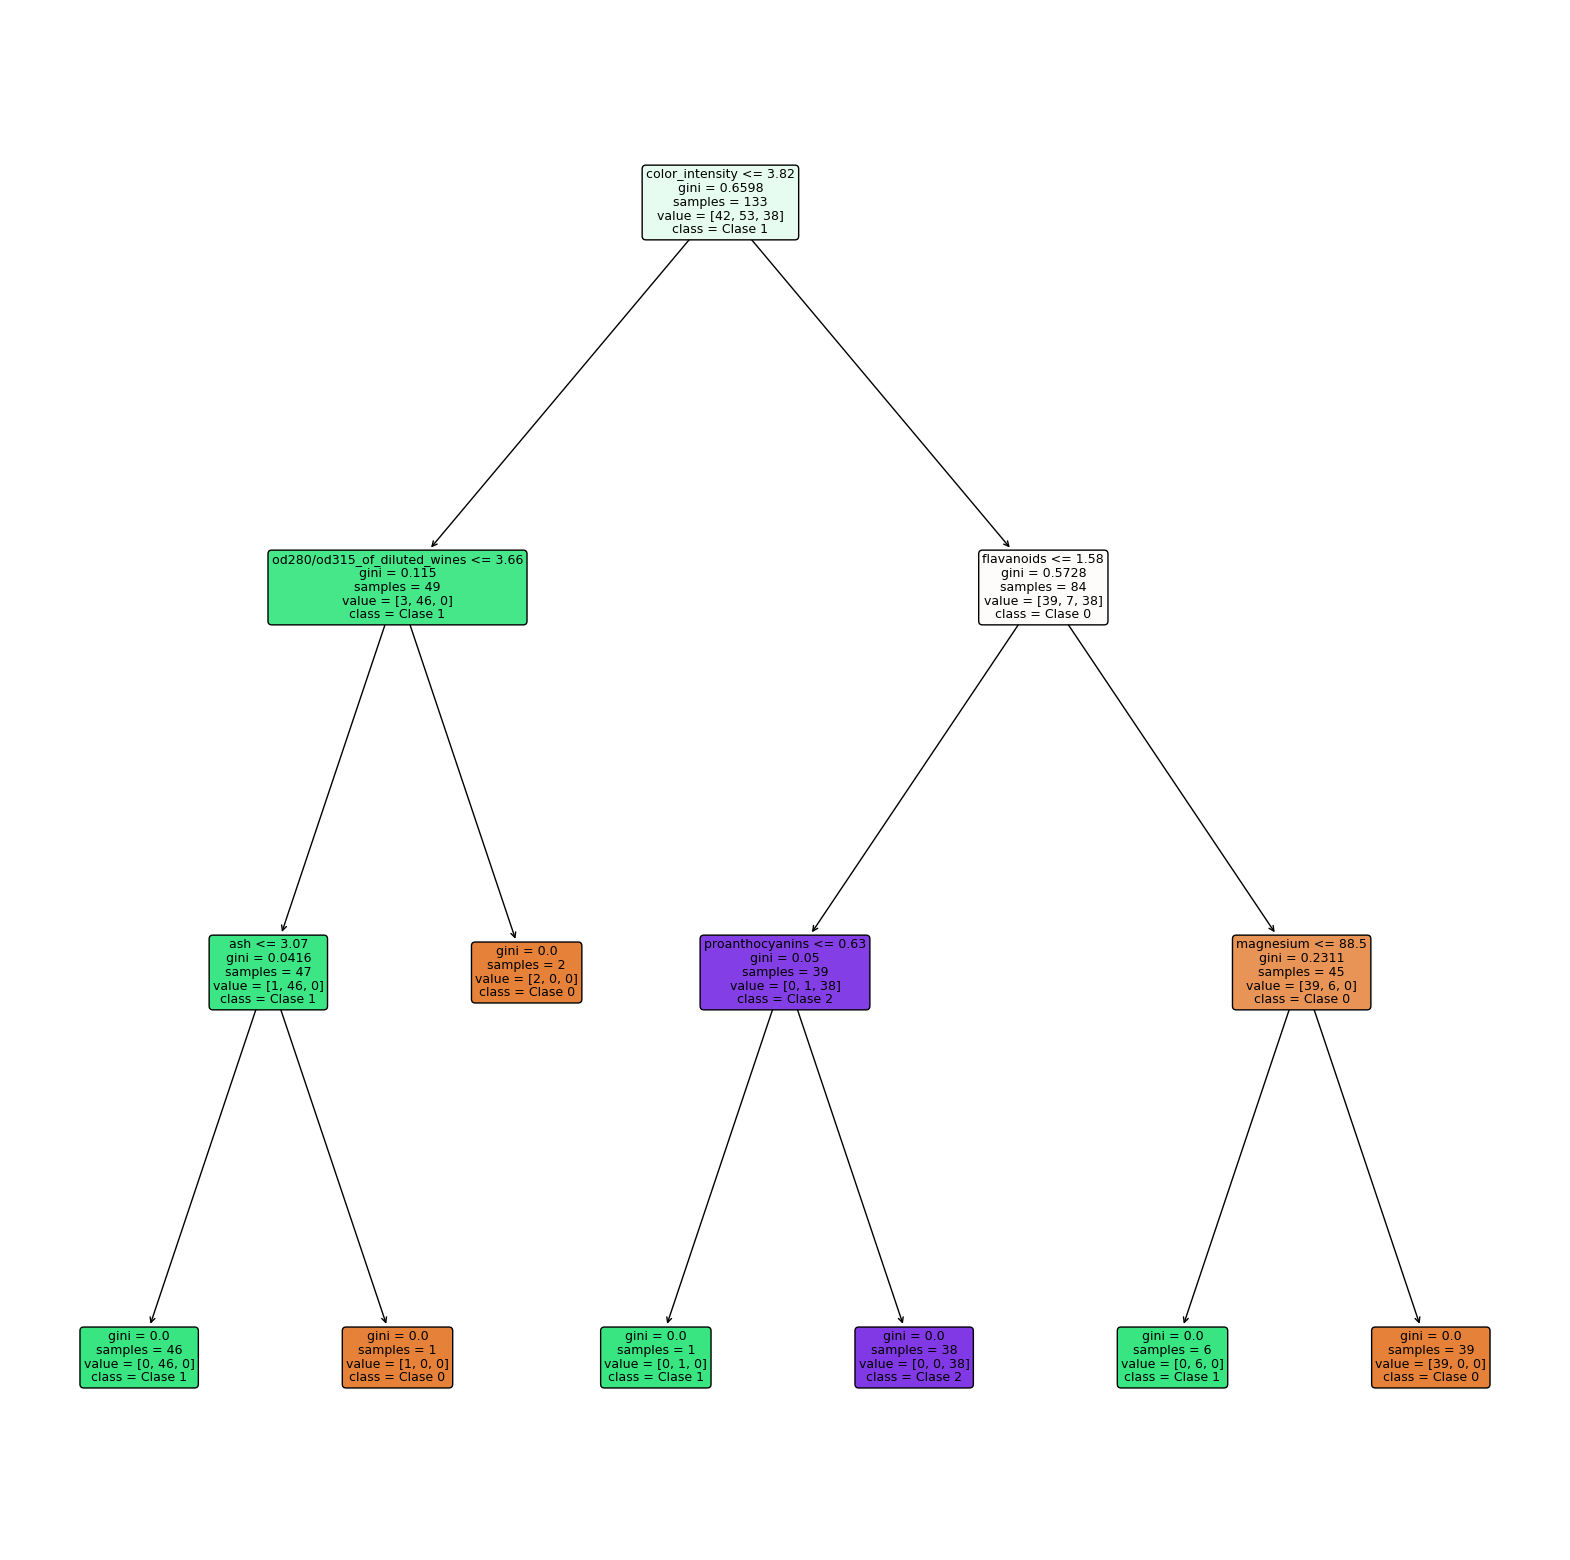

In [24]:
# Visualización del árbol de decisión
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = wine_df.columns, 
                     class_names =["Clase 0", "Clase 1", "Clase 2"] , filled = True , precision = 4, rounded = True)

Ahora se va a probar a crear diferentes árboles de decisión cambiando sus parámetros, para ver como estos afectan al rendimiento.

Los parámetros que se van a modificar son:

- max_depth: Profundidad máxima del árbol. Mayor profundidad significa que el árbol puede realizar patrones más complejos, pero tener un max_depth puede llevar al overfitting.
- min_samples_leaf: Mínimo de muestras necesarias para que un nodo se convierta en un nodo hoja. Es decir, si hay suficientes muestras que superen este mínimo, el nodo en cuestión no seguirá dividiéndose. 
- min_samples_split: Número de muestras mínimo para dividir un nodo. Es decir, si no se supera este número, el arbol se parará en ese paso.

A continuación se crearán distintos árboles de decisión con diferentes parámetros:

In [13]:
# Creación de los árboles de decisión, y predicción de los resultados
dtree2=DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=6)
dtree2.fit(X_train,y_train)
y_pred2 = dtree2.predict(X_test)

dtree3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=2)
dtree3.fit(X_train,y_train)
y_pred3 = dtree3.predict(X_test)

dtree4=DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)
dtree4.fit(X_train,y_train)
y_pred4 = dtree4.predict(X_test)

Ahora se evaluará cada árbol siguiendo el mismo proceso que se ha realizado con el primero:

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.83      1.00      0.91        15
           2       1.00      0.88      0.94        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



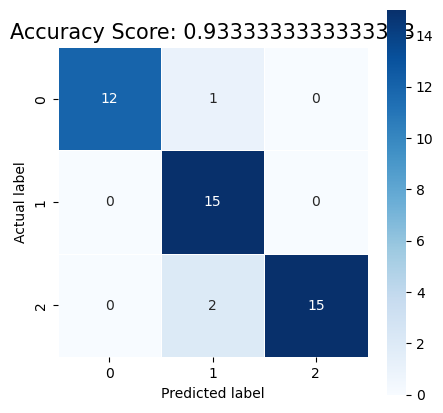

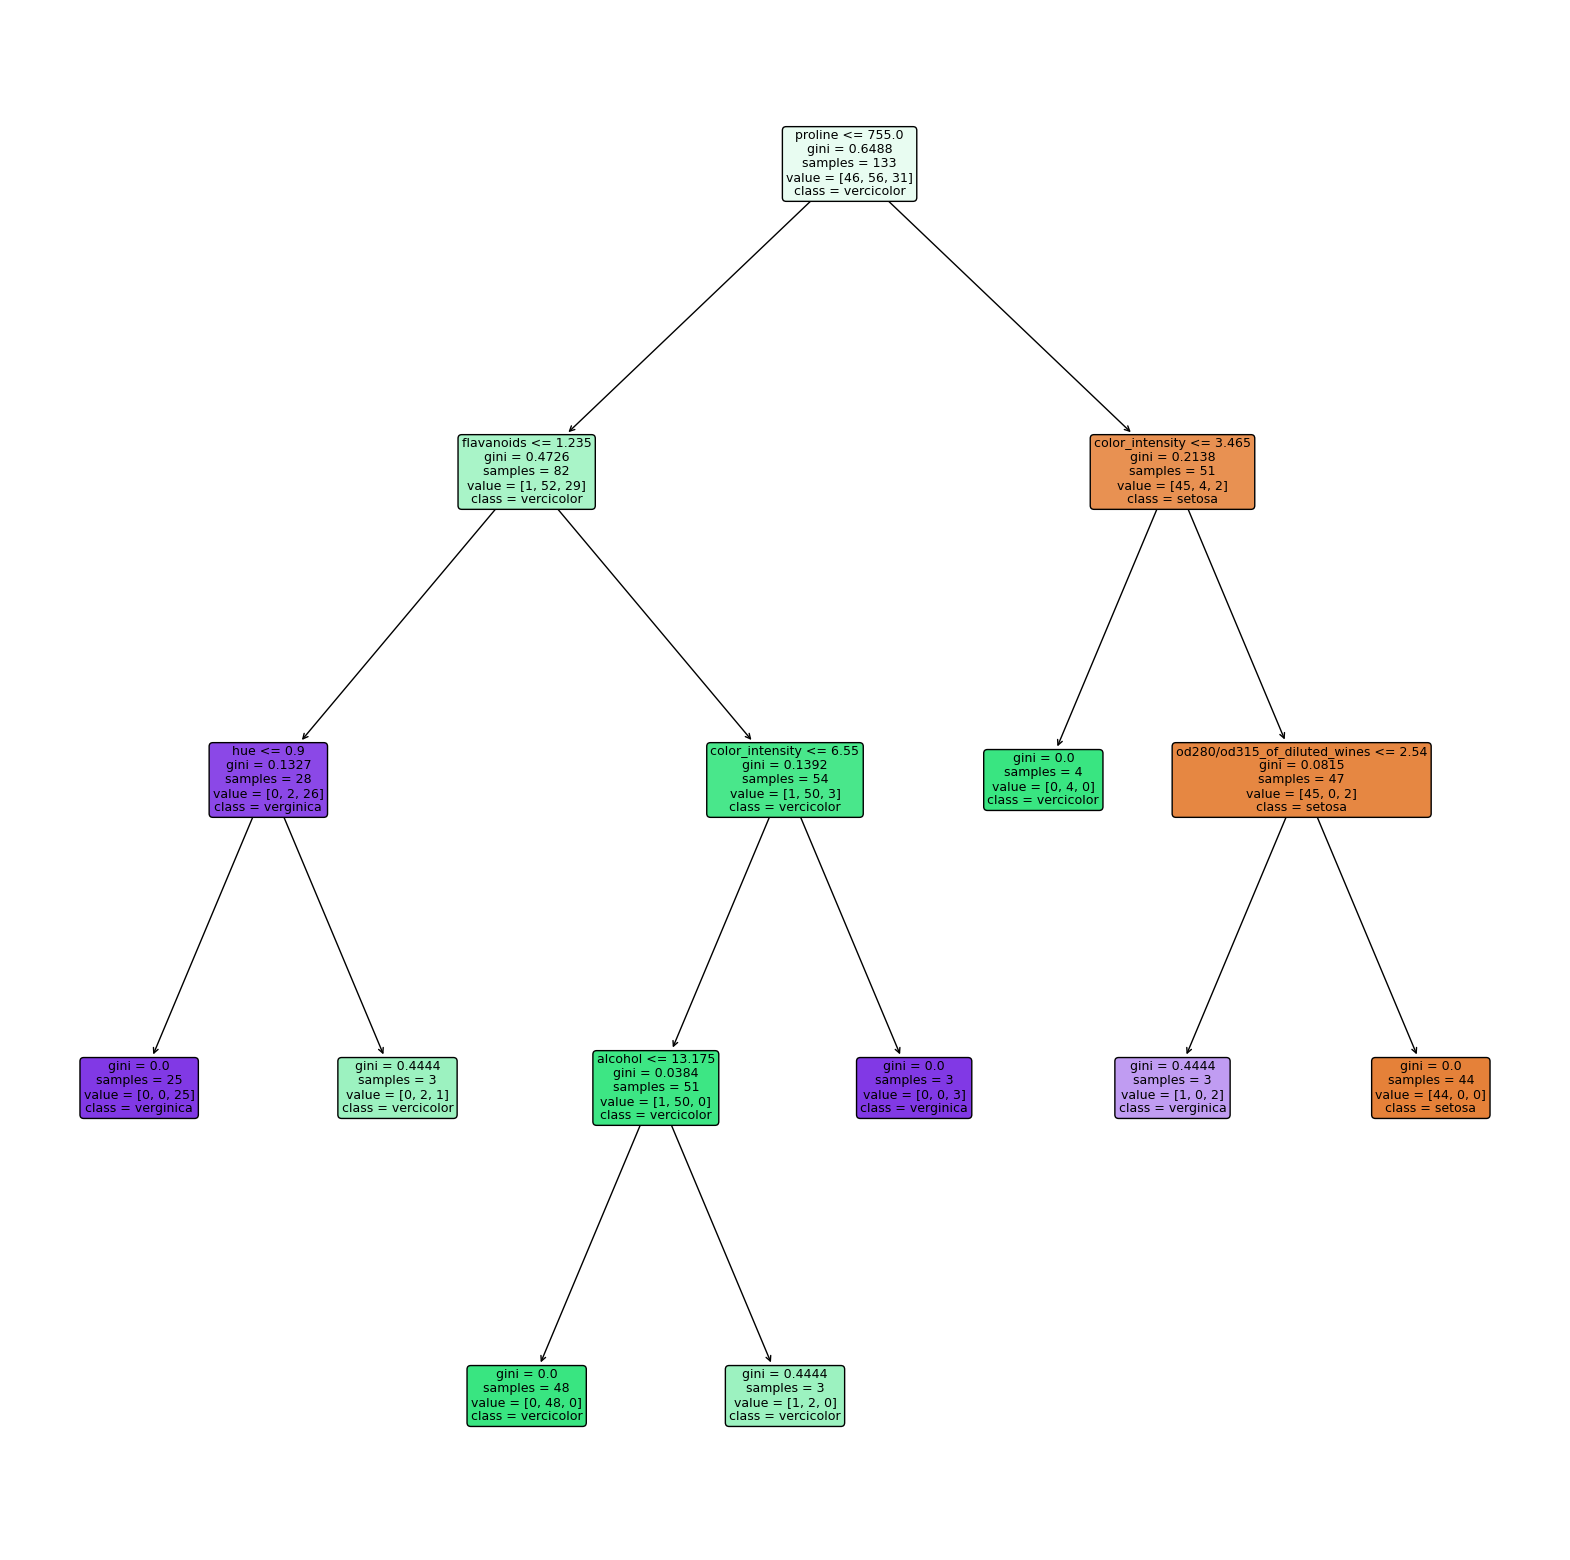

In [14]:
# Arbol 2

# Reporte
print("Reporte del árbol 2 - \n", classification_report(y_test,y_pred2))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

all_sample_title = 'Accuracy Score: {0}'.format(dtree2.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# Visualizacion del arbol
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree2, feature_names = wine_df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

Classification report - 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.78      0.93      0.85        15
           2       0.91      0.59      0.71        17

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.79        45



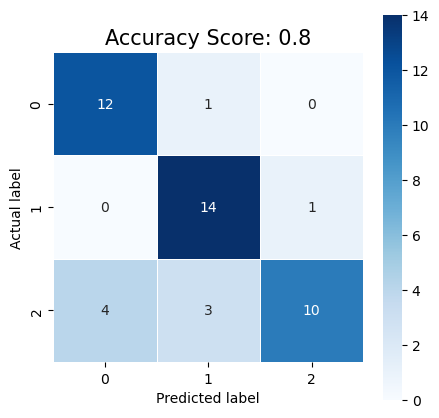

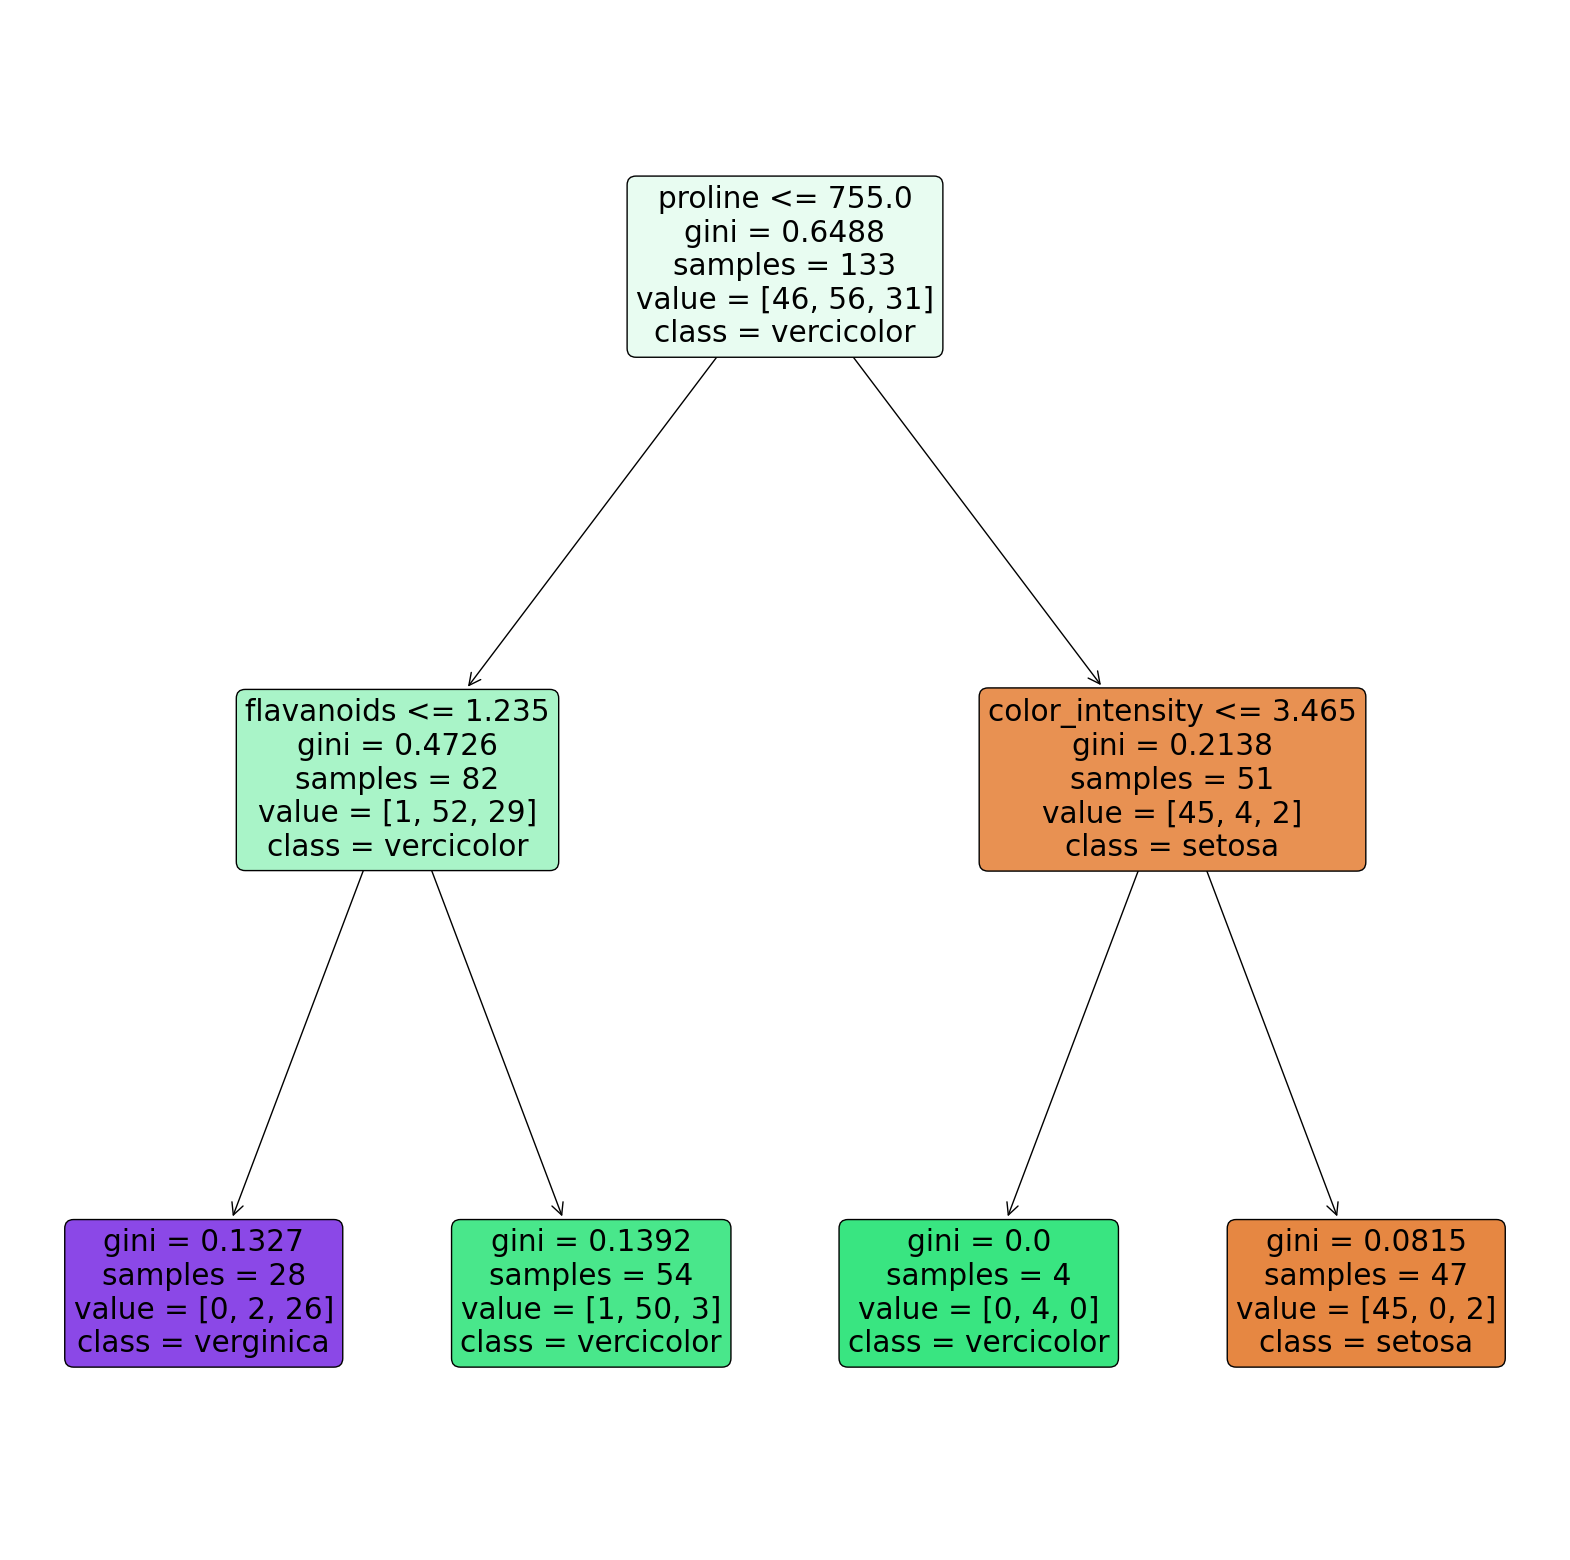

In [15]:
# Arbol 3

# Reporte
print("Reporte del árbol 3 - \n", classification_report(y_test,y_pred3))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

all_sample_title = 'Accuracy Score: {0}'.format(dtree3.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# Visualizacion del arbol
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree3, feature_names = wine_df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

Classification report - 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.88      0.93      0.90        15
           2       0.92      0.71      0.80        17

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.84        45
weighted avg       0.86      0.84      0.84        45



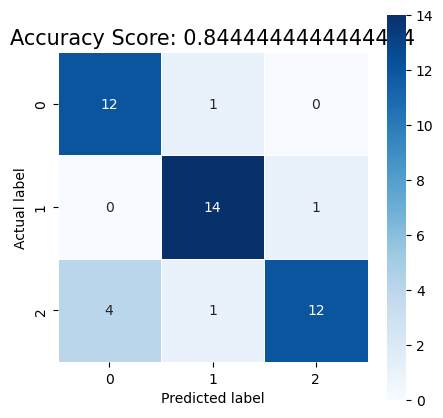

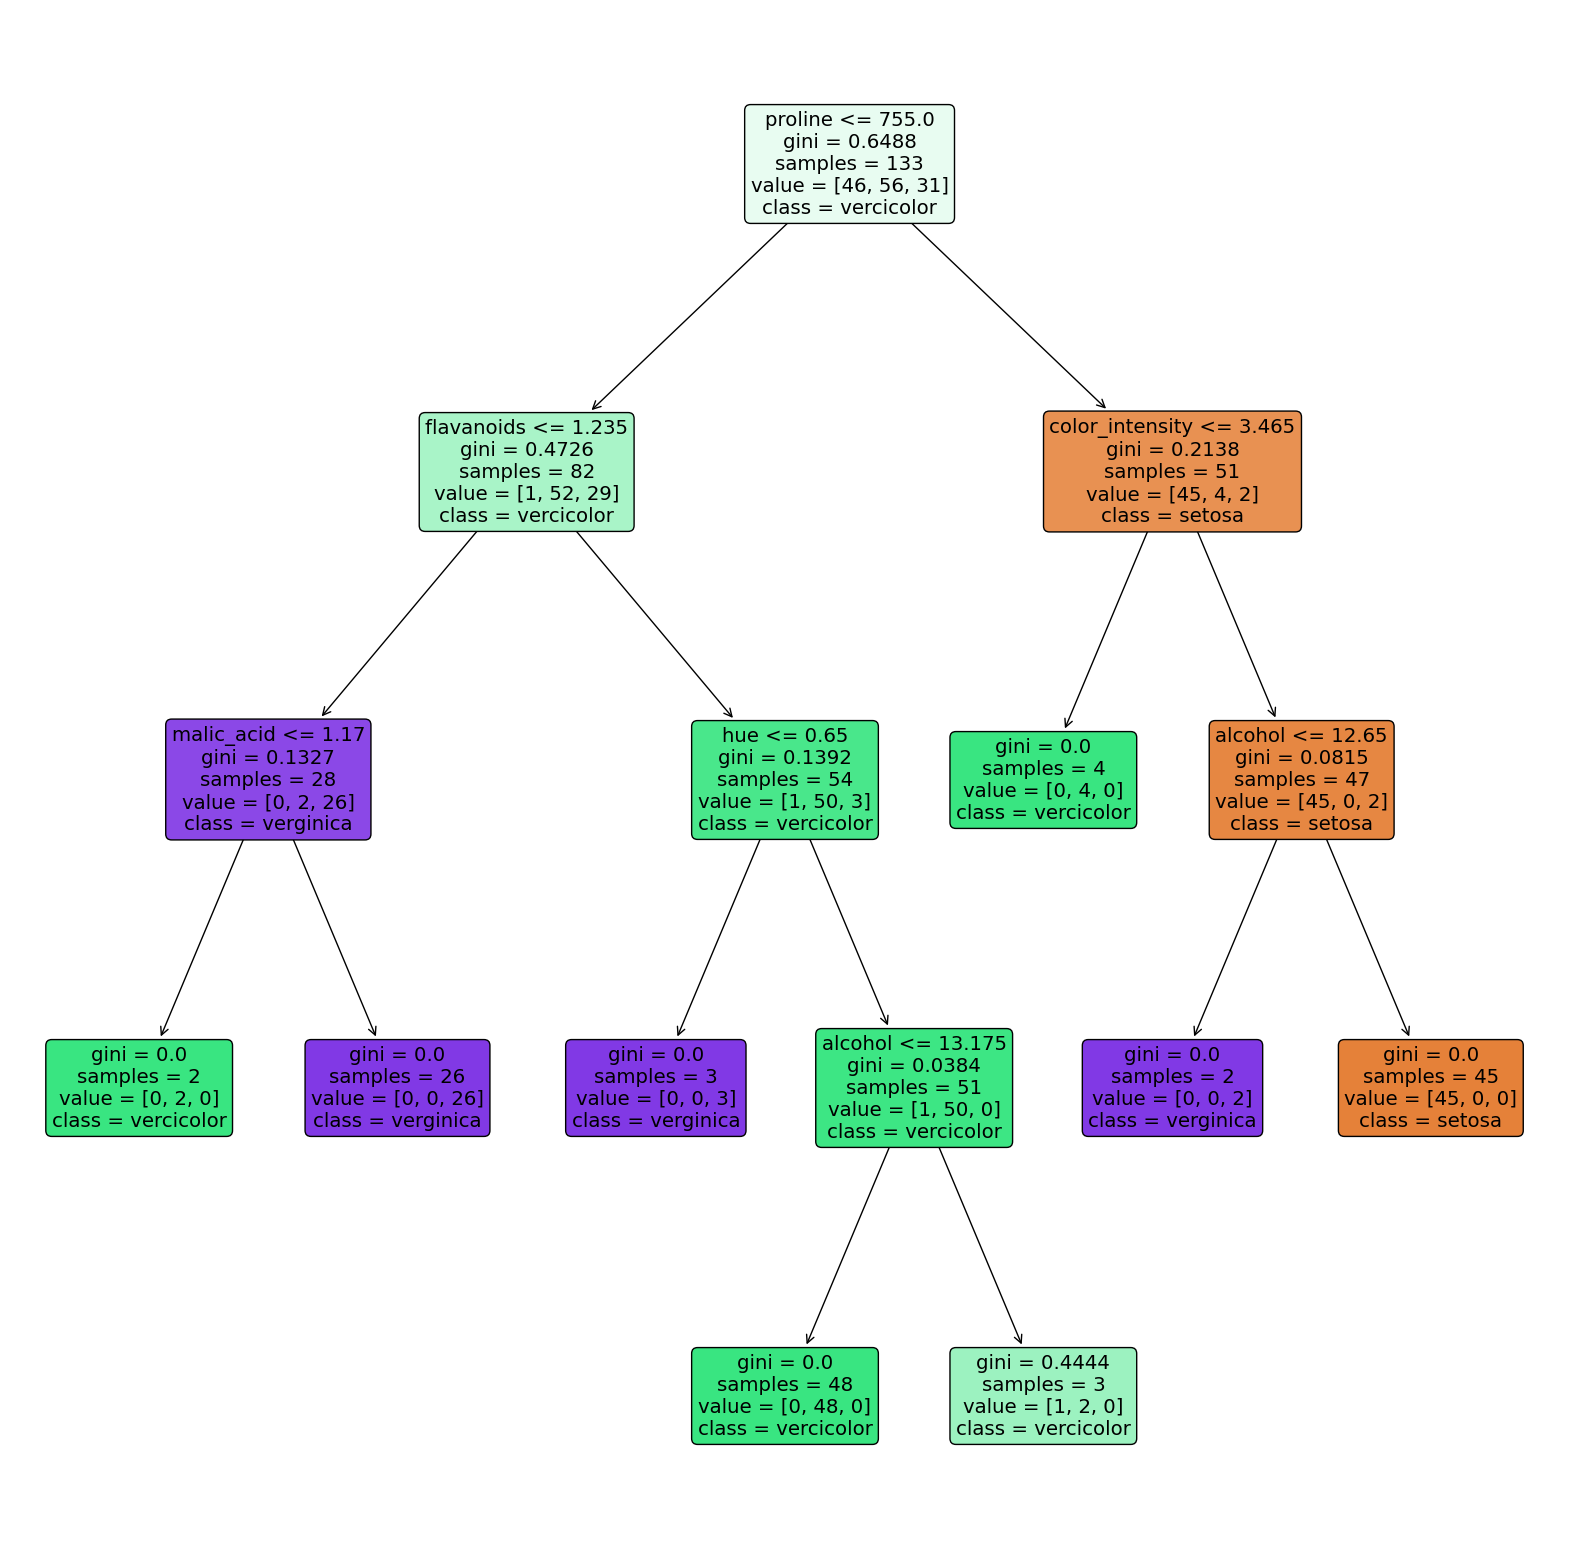

In [16]:
# Arbol 4

# Reporte
print("Reporte del árbol 4 - \n", classification_report(y_test,y_pred4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

all_sample_title = 'Accuracy Score: {0}'.format(dtree4.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# Visualizacion del arbol
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree4, feature_names = wine_df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

Los resultados llevan a que los mejores parámetros son el del árbol 2, que son los siguientes:

- max_depth = 5 
- min_samples_leaf = 3
- min_samples_split = 6

Comparando los árboles entre ellos, queda claro que el min_samples_leaf tiene que ser menor al min_samples_split, y que no hay que utilizar un max_depth, ya que se pierde rendimiento a medida que se va aumentando este parámetro.

## Conjunto 2

El fichero datos_pago_microcreditos.csv contiene 30000 transacciones bancarias relativas al pago o impago de microcreditos. El dataset consta de 62 dimensiones propietarias de las cuales el banco no ha proporcionado informacion por confidencialidad, a parte de su valor. La matriz de entrada se encuentra en x_train, e y_train contiene la etiqueta relativa a esa transaccion, un 1 indica que si se pagó el microcredito y un 0 que no se pagó.

Considera que el tamaño del dataset es lo suficientemente grande como para, dependiendo de los recursos de la maquina, poder tardar varias horas en entrenar modelos complejos. Usando verbose=4 durante el fit para la optimización de parámetros podras ver el tiempo que tarda cada fit. El valor del parámetro "verbose" es un número entero que indica el nivel de detalle de la información que se desea mostrar durante el entrenamiento del modelo.

Ejecuta el código inicial para estandarizar los datos y contesta las siguientes preguntas.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data_file='datos_pago_microcreditos.csv'

pdl=pd.read_csv(data_file)

In [4]:
pdl["payment"]=np.where(pdl["payment"]=="Success",1,0)

k=pdl.columns

for col in k:
    if pdl[col].dtype=='object':
        temp=pd.get_dummies(pdl[col],drop_first=True,prefix=col)
        pdl=pd.concat([pdl,temp],axis=1)
        pdl.drop([col],axis=1,inplace=True)


pdl.dropna(axis=0,inplace=True)

In [5]:
pdl_train, pdl_test = train_test_split(pdl, test_size = 0.2,random_state=2)

#x_train=pdl_train.drop(["payment"],1)
x_train=pdl_train.drop(columns="payment")
y_train=pdl_train["payment"]

#x_test=pdl_test.drop(["payment"],1)
x_test=pdl_test.drop(columns="payment")
y_test=pdl_test["payment"]

x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [16]:
y_train

0        0
1        1
2        0
3        0
4        1
        ..
23995    0
23996    1
23997    0
23998    0
23999    1
Name: payment, Length: 24000, dtype: int32

### Pregunta 4

Usando RandomSearchCV, identifica para un clasificador K-NN el numero de vecinos entre 1 y 30 que optimiza el resultado usando como scoring de la optimizacion el area bajo la curva (roc_auc) y con 10 folds para la validacion cruzada. Presenta los parametros optimos y evalúa el clasificador optimo con esos parámetros.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score
# Paquete para realizar gráficas
import seaborn as sns

$RandomSearchCV$ es un método que se ocupa de encontrar la mejor combinación de parámetros para un modelo en concreto, en este caso, un clasificador K-NN. Este método puede sonar idéntico a $GridSearchCV$, pero tiene una importante diferencia. $GridSearchCV$ comprueba todas y cada una de las combinaciones posibles de los parámetros indicados, haciendo que este proceso sea computacionalmente muy costoso. En cambio $RandomSearchCV$, combina los parámetros una cantidad cerrada de veces (eligiendo las combinaciones de manera aleatoria), no comprueba todas las combinaciones posibles. Esto ahorra mucha potencia computacional, dando buenos resultados. 

Se usa como se observa en la siguiente celda:

In [27]:
# Crear clasificador KNN
knn = KNeighborsClassifier()

# Definir parámetros a combinar, en este caso, solamente el numero de vecinos de 1 a 30
params = {'n_neighbors': range(1, 31)}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=params, scoring='roc_auc', n_iter=30, cv=10)

# Realizar la búsqueda de hiperparámetros
random_search.fit(x_train, y_train)

  File "C:\Users\diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions={'n_neighbors': range(1, 31)},
                   scoring='roc_auc')

Tras encontrar la mejor combinación de parámetros, y entrenar dicho modelo, ahora se puede pasar a evaluarlo. Para ello, primero se mostrará cuales son los parámetros elegidos en este caso (mostrando el número de n vecinos, ya que los demás parámetros son los predeterminados), y se obtendrá el roc auc score a partir de las probabilidades que tiene el modelo de predecir la clase positiva, en este caso, cuando se ha pagado el microcrédito:

In [29]:
# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros encontrados:{random_search.best_params_}")

# Obtener el mejor clasificador obtenido por el RandomSearch
best_knn = random_search.best_estimator_

# Evaluación del modelo usando roc_auc
y_pred_proba = best_knn.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Área bajo la curva ROC, AUC en el conjunto de prueba: {roc_auc}")

Mejores parámetros encontrados:{'n_neighbors': 30}
Área bajo la curva ROC, AUC en el conjunto de prueba: 0.7894877589212287


El resultado llama la atención debido a que se ha elegido 30 como número de vecinos óptimo. Un numero alto de n_neighbors puede provocar un alto coste computacional, y a veces la pérdida de algunas predicciones más "sueltas", más separadas de lo normal. 

Respecto al AUC, el resultado no es malo, el modelo es capaz de predecir correctamente los resultados, pero tiene mucho margen de mejora. Esto se podría conseguir cambiando más parámetros, para obtener una combinación más óptima.

### Pregunta 5

Obten la matriz de confusión del clasificador optimo anterior. ¿cómo lees cada uno de los valores?¿qué valor de precision y recall tiene el clasificador optimizado con roc_auc?

Para crear la matriz de confusión, primero se crea el objeto $y$_ $pred$ que contiene las predicciones realizadas del modelo sobre el conjunto de prueba. 

Después se usará el método $confusion$_ $matrix$, que creará la matriz de confusión a partir de estas predicciones, y el conjunto $y$_ $test$, que contiene los resultados que debería predecir el modelo.
Después a esto, se usaría el mapa de calor del paquete $Seaborn$, para graficar de una manera visual la matriz de confusión:

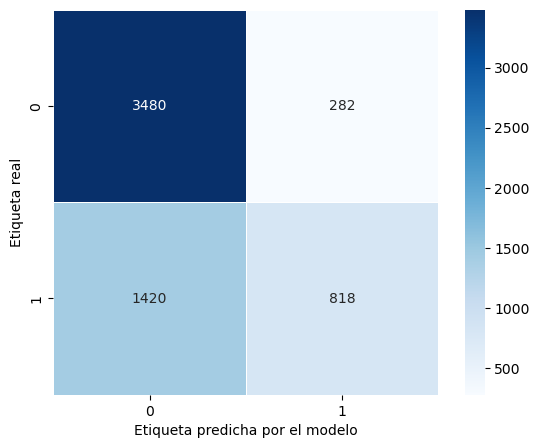

In [30]:
y_pred_knn = best_knn.predict(x_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm_knn, linewidths=.5, annot=True,square = True, fmt='d',  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

plt.show()

La matriz de confusión se lee de la siguiente forma:

In [10]:
print("[Verdaderos Positivos     Falsos Positivos \nFalsos Negativos      Verdaderos Negativos]")

[Verdaderos Positivos     Falsos Positivos 
Falsos Negativos      Verdaderos Negativos]


Es decir, en el caso de la etiqueta 0, el modelo lo ha predicho 3480 veces de forma correcta, y 1420 de forma incorrecta (lo ha predicho como una etiqueta 1 en vez de 0). Por otro lado, ha fallado 282 prediciendo la etiqueta 1 por la 0, y ha acertado 818 veces.

Como se ha dicho en el ejercicio anterior, el rendimiento del modelo es muy mejorable. Esto se va a terminar de confimar tras ver los resultados de precisión y recall que se obtienen a continuación:

In [31]:
# Calcular la precisión y recall
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

print(f"Precisión del modelo: {precision}")
print(f"Recall (sensibilidad) del modelo: {recall}")

Precisión del modelo: 0.7436363636363637
Recall (sensibilidad) del modelo: 0.36550491510277033


El resultado es que el modelo es más preciso que sensible, es decir, es capaz de predecir la mayoría de verdaderos positivos, pero hay muchos que se pierden, ya que obtiene una puntuación de 0.74, que esta bien, pero es mejorable

### Pregunta 6

Identifica para el mismo problema los valores optimos de un clasificador SVC que use el kernel rbf usando el area bajo la curva como métrica. Ten en cuenta que hacer el fit de cada fold de SVC es mucho mas costoso computacionalmente que con KNN.

El primero paso es importar el modelo SVC:

In [32]:
from sklearn.svm import SVC

Posteriormente, se seguirá un proceso parecido al de la pregunta anterior. Primero se creará el modelo SVC usando el método $SVC$. 

Después, se creará el objeto $params$, que contiene los parámetros que el random search evaluará. El siguiente paso entonces será crear el objeto random search, con el método $RandomizedSearchCV$. Por último, tras encontrar el modelo más óptimo, se prodrá entrenar dicho modelo haciendo fit sobre él.

In [11]:
svc = SVC(kernel='rbf', probability = True)

# Definir los parámetros a ajustar y sus posibles valores
parametros_svc = {
    'C': [0.1, 1, 10],
    'degree': [1, 3, 5],                      
    'coef0': [0, 1]             
}

random_search_svc = RandomizedSearchCV(svc, param_distributions=parametros_svc, scoring='roc_auc', n_iter=10, cv=3, n_jobs=-1)
                                       
random_search_svc.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'coef0': [0, 1],
                                        'degree': [1, 3, 5]},
                   scoring='roc_auc')

Ahora se pasará a evaluar el modelo de la misma forma que en la pregunta anterior, viendo el valor AUC, la matriz de confusión, la precision y el recall:

In [33]:
# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados para SVM:")
print(random_search_svc.best_params_)

# Obtener el clasificador SVM óptimo
best_svc = random_search_svc.best_estimator_

# Evaluar el clasificador óptimo en el conjunto de prueba
y_pred_proba_svc = best_svc.predict_proba(x_test)[:, 1]
roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc)

print(f"\nÁrea bajo la curva (ROC AUC) para SVM en el conjunto de prueba: {roc_auc_svc}")

Mejores parámetros encontrados para SVM:
{'degree': 3, 'coef0': 0, 'C': 10}

Área bajo la curva (ROC AUC) para SVM en el conjunto de prueba: 0.8765002928965113


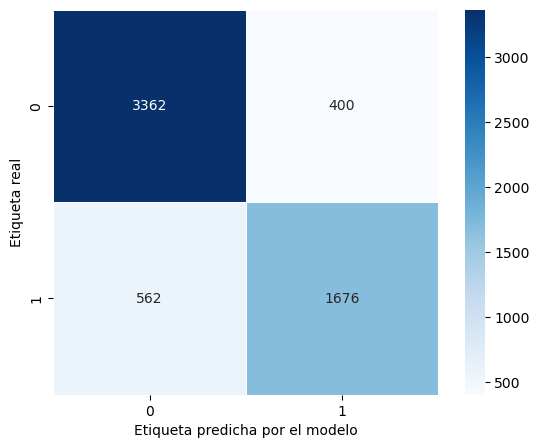

In [34]:
y_pred_svc = best_svc.predict(x_test)

cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm_svc, linewidths=.5, annot=True,square = True, fmt='d',  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

plt.show()

In [16]:
# Calcular la precisión y recall
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)

print(f"Precisión del modelo: {precision}")
print(f"Recall (sensibilidad) del modelo: {recall}")

Precisión del modelo: 0.8073217726396917
Recall (sensibilidad) del modelo: 0.7488829311885612


Los resultados son mucho mejores en este último modelo que el primer modelo knn entrenado. Hay que tener en cuenta que en el modelo SVC, tan solo se han configurado 3 folds al hacer el randomized search, lo cuál puede indicar que existe un modelo que funcione todavía mejor.

Por tanto, se puede concluir con que el modelo SVC es muy superior en este ejercicio concreto.

### Pregunta 7

GradientBoostingClasifier es uno de los métodos de scikitlearn que suele producir resultados bastante adecuados. Implementa un clasificador utilizando GradientBoostingClasifier considerando 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 como learning rate.¿qué learning rate produce un resultado optimo usando roc_auc?

El primer paso es importar el método que contiene el $GradientBoostingClasifier$

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

Posteriormente, se seguirán los mismos pasos que las preguntas anteriores. Primero se creará el modelo con el método anteriormente importado, se creará un diccionario con los parámetros a probar, en este caso, solo el $learning$_ $rate$, y se realizará una búsqueda del mejor modelo posible según dicho parámetro. Por último se realizará un $fit$ para entrenar el modelo:

In [21]:
# Se define el modelo GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Se definen los learning rates que irá tomando el modelo a lo largo del GridSearchCV
params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

# Se crea un GridSearchCV para que encuentre la mejor combinación
GS_gb = GridSearchCV(gbc, params, scoring='roc_auc', cv=10, n_jobs = -1)

# Se entrena al modelo con el conjunto de train
GS_gb.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]},
             scoring='roc_auc')

Ahora se verá que $learning$_ $rate$ se ha seleccionado, y se evaluará el modelo viendo que AUC ha conseguido:

In [23]:
# Se visualizan los mejores parámetros
print("Mejores parámetros encontrados para Gradient Boosting:")
print(GS_gb.best_params_)

# Se obtiene el mejor modelo
best_gbc = GS_gb.best_estimator_

# Evaluación de dicho mejor modelo calculando el AUC
y_pred_proba = best_gbc.predict_proba(x_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_pred_proba)
print(f"\nÁrea bajo la curva (ROC AUC) para SVM en el conjunto de prueba: {roc_auc_gb}")

Mejores parámetros encontrados para Gradient Boosting:
{'learning_rate': 0.2}

Área bajo la curva (ROC AUC) para SVM en el conjunto de prueba: 0.8886381571227062


El $learning$_ $rate$ seleccionado por el $GridSearchCV$ ha sido de 0.2. Este modelo con dicho parámetro es el que mejor AUC ha obtenido, lo que significa que es el mejor modelo de los 3 creados para los datos de este ejercicio

### Pregunta 8

Usando la matriz de confusión de los tres casos y utilizando las métricas que te parezcan oportunas ¿qué clasificador de los 3 seleccionarias y por qué?

A continuación se van a crear de nuevo todas las matrices de confusión:

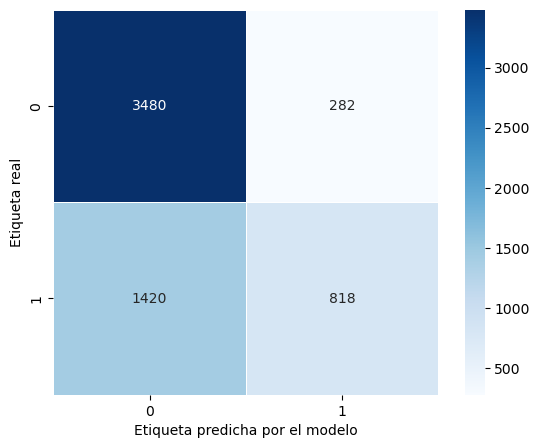

In [35]:
# KNN

plt.figure(figsize=(7,5))

sns.heatmap(data=cm_knn, linewidths=.5, annot=True,square = True, fmt='d',  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

plt.show()

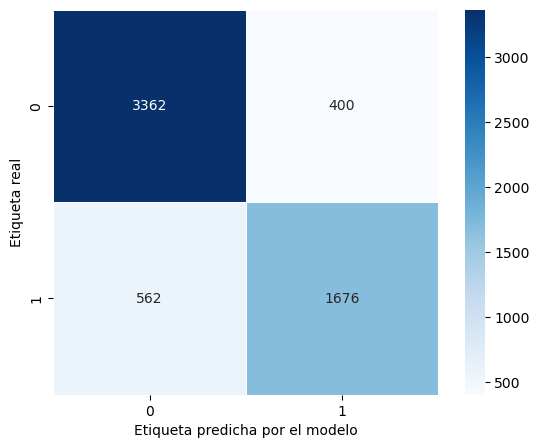

In [36]:
# SVC

y_pred_svc = best_svc.predict(x_test)

cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm_svc, linewidths=.5, annot=True,square = True, fmt='d',  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

plt.show()

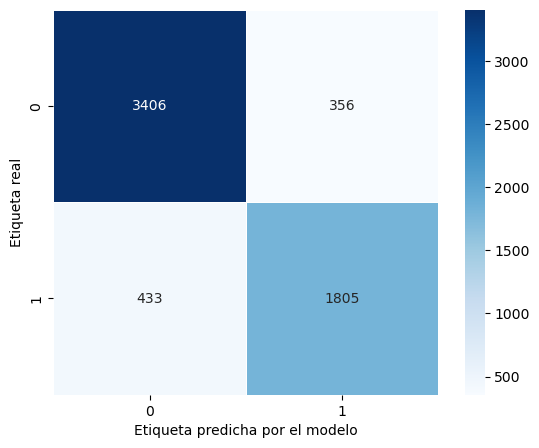

In [37]:
# GBC

y_pred_gbc = best_gbc.predict(x_test)

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm_gbc, linewidths=.5, annot=True,square = True, fmt='d',  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

plt.show()

Basándose en las matrices de confusión y en todas las estadísticas obtenidas en los ejercicios anteriores, es fácil identificar que los modelos han ido de menos a más, es decir, el GradientBoostingClasifier es el que mejores resultados ha dado, ya que ha sido capaz de acertar 3406 veces la etiqueta 0, y 1805 la etiqueta 1 de manera correcta.

El modelo que más se le hacerca el SVC, con un rendimiento parejo. Sin ningún tipo de dudas, el modelo KNN es el que peor funciona en este ejercicio.

Por tanto, si hubiese que quedarse con uno, habría que elegir el GradientBoostingClasifier por su rendimiento superior.

## Conjunto 3

El dataset winequality-red.csv es un dataset que contiene para los vinos de la denominación de origen Minho una serie de métricas donde se caracterizan diferentes tipos de vinos. Entre estos valores se encuentran el pH, su densidad, el nivel de alcohol o su calidad (de 1 a 6). En este ejercicio usaremos este dataset para probar diferentes técnicas de clustering

In [2]:
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [3]:
wine

,Unnamed: 0,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Pregunta 9

Utilizando solo las columnas "sulphates","alcohol","pH", y usando KMeans identifica el numero optimo de clusters para el conjunto de datos utilizando la "inertia_" para medir la compacidad de los clusteres.

El primer paso es importar el módulo que permite utilizar $KMeans$

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Ahora se creará un nuevo DataFrame a partir del anterior, solo quedándose las columnas señaladas por el enunciado:

In [5]:
p9_wine = wine[["sulphates", "alcohol", "pH"]]
p9_wine

,sulphates,alcohol,pH
0,0.56,9.4,3.51
1,0.68,9.8,3.20
2,0.65,9.8,3.26
3,0.58,9.8,3.16
4,0.56,9.4,3.51
...,...,...,...
1594,0.58,10.5,3.45
1595,0.76,11.2,3.52
1596,0.75,11.0,3.42
1597,0.71,10.2,3.57


Para obtener el número óptimo de clusters para el conjunto dado, habrá que entrenar distintos modelos $KMeans$ cambiando el parámetro que define cuantos clústeres se crean, $n$_ $clusters$. Se va a comprobar en un rango del 1 al 9 de la siguiente forma:

In [6]:
# Entrenamiento de todos los modelos KMeans
kmeans_per_k = [KMeans(n_clusters=k, n_init=10).fit(p9_wine) for k in range(1, 10)]
# Se guardan la inertia de cada modelo
inertias = [model.inertia_ for model in kmeans_per_k]

  File "C:\Users\diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Ahora ya con los modelos entrenados, y después de conseguir la intertia de cada uno, se va a proceder a graficar los resultados para poder encontrar el número de clústeres óptimo:

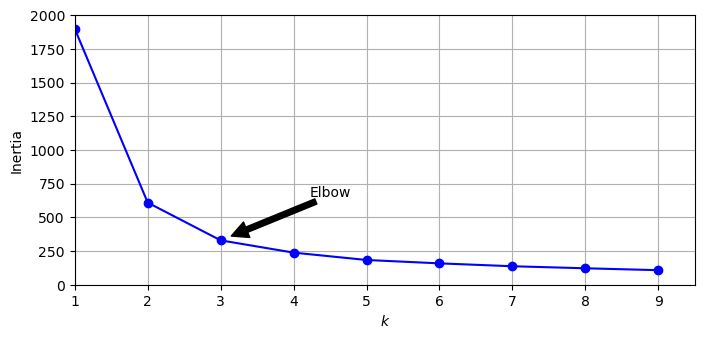

In [7]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(3, inertias[2]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1,9.5, 0, 2000])
plt.grid()
plt.show()

El número de clústeres óptimo es aquel donde se visualize el codo (elbow) en la gráfica realizada. Es decir, el punto en la que la pendiente se suaviza y de ahí en adelante deja de cambiar bruscamente. En este caso, el número de clústeres óptimo es 3.

A continuación, se crea el modelo $KMeans$ óptimo, y se obtiene su inertia:

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10)
y_pred = kmeans.fit_predict(p9_wine)
kmeans.inertia_

329.25142813681003

### Pregunta 10

Usando los "cluster_centers_" del clustering optimo. ¿qué dicen estos representantes de clase de cada cluster? ¿cuáles son los valores de los indices de Davies-Bouldin y de Silhouette para este conjunto de clusters?

Para obtener los centroides de cada clúster, hay que utilizar el método $cluster$_ $centers$_ sobre el modelo $kmeans$ óptimo anteriormente creado.

Estos centroides muestran el valor medio de las features en cada clúster:

In [15]:
kmeans.cluster_centers_

array([[ 0.67817021, 12.35624113,  3.35144681],
       [ 0.64232779,  9.5952692 ,  3.28655582],
       [ 0.67465517, 10.88777139,  3.33256705]])

La diferencia más grande entre clústeres es la segunda carácterística, la cantidad de alcohol. Los vinos del primer clúster son los que más alcohol tienen, después el tercer clúster y por último el segundo.

En cuanto a las otras dos carácterísticas, las diferencias son bastante pequeñas.

A continuación se calculará el valor del índice Silhouette para este conjunto de clusters. Este valor evalua el rendimiento del modelo KMeans, señalando cuan separados están los clusters entre sí. Este valor tiene un rango de -1 a 1, y cuanto más se acerque al 1, mejor rendimiento del modelo.

Para calcularlo habrá que hacer lo siguiente:

In [55]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_score = silhouette_score(p9_wine, kmeans.labels_)
silhouette_score

0.539878771097189

El resultado del índice de Silhouette es bastante bueno, señalando que los clústeres son están separados entre sí, y hay una probabilidad baja de que la asignación de un punto a un clúster sea errónea.

Por otro lado, el índice de Davies-Bouldin evalúa la dispersión dentro y fuera de los clústeres.

A menor índice de Davies-Bouldin, mejor rendimiento tiene el modelo. Para calcularlo hay que seguir los siguientes pasos:

In [59]:
from sklearn.metrics import davies_bouldin_score

In [60]:
davies_bouldin_score = davies_bouldin_score(p9_wine, kmeans.labels_)
davies_bouldin_score

0.608126412451

Este resultado también es muy bueno, ya que es un índice bajo. Eso señala que la calidad del clustering es alta

### Pregunta 11

Selecciona otro metodo de clustering que te parezca relevante e implementalo. ¿cómo se comparan los clusteres de este caso con los obtenidos en la Pregunta 1? Si tuvieras que elegir un cluster de los datos, ¿cual elegirías y por qué?

Para este caso se va a utilizar el $GaussianMixture$ como se ve a continuación:

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [6]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(p9_wine)

  File "C:\Users\diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\diego\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


GaussianMixture(n_components=3, n_init=10)

Tras entrenar el modelo, se va evaluar de la misma forma que en el ejercicio anterior el modelo KMeans, obteniendo los índices de Silhouette y Davies Bouldin:

In [13]:
# Predicciones del modelo
gm_preds = gm.predict(p9_wine)

# Evaluar el rendimiento con índice de Silhouette
silhouette_gm = silhouette_score(p9_wine, gm_preds)
print(f"Índice de Silhouette: {silhouette_gm}")

davies_bouldin_gm = davies_bouldin_score(p9_wine, gm_preds)
print(f"Índice de Davies Bouldin: {davies_bouldin_gm}")

Índice de Silhouette: 0.12457125956582901
Índice de Davies Bouldin: 1.3213334139044852


Según estos índices, el modelo es peor en ambos aspectos. Es decir, los clústeres no están tan separados entre sí como con KMeans, y además la separación inter-cluster es mayor, lo que puede hacer que hayan puntos que caigan en clústeres que no tocan.

## Conjunto 4

### Pregunta 12

El fichero hr_train.cvs contiene una tabla sobre los empleados de una empresa. Entre otros incluye información de su nivel de satisfacción, de la última evaluación obtenida, del numero de proyecto en el que se encuentra, del número medio de horas por semana, del número de años que lleva en la compañía, si ha tenido o no un accidente en el trabajo, si se ha ido (left) de la compañia, si ha tenido una promocion en los ultimos 5 años, y por último su nivel salarial (descrito como medio, alto o bajo) y el departamento en que se encuentra (sales/technnical ...)

#### El departamento de RRHH esta solicitando un clasificador que pueda predecir si alguien esta en riesgo de irse de la compañia para poder actuar  proactivamente. 

Notas:
- La columna "left" indica si alguien se ha ido de la compañia, es la "y" del problema.
- Las columnas "sales" y "salary" son alfanuméricas. La mayoría de clasificadores (aunque no todos) no trabajan bien con este tipo de variables y requieren valores numéricos. Dado el caso dispones de diferentes alternativas: (1) eliminar esas columnas y trabajar con el resto o (2) traducir esas columnas en columnas binarias - por ejemplo si "salary" tiene tres valores eliminar la columna original y sustituirla por tres columnas salary_low, salary_medium, salary_high donde se pondra un 1 en el tipo de salario y un 0 en las otras dos columnas restantes. Lo mismo para "sales", donde se transformara esa columna en tantas columnas como departamentos y un 1 en el departamento en que se encuentre el trabajador. Este es un preproceso muy tipico.

Nota de evaluación:

En este ejercicio más que el resultado final (que tambien) se evaluarán los pasos y el razonamiento utilizado en cada decisión que se toma para la implementación del modelo. 


In [2]:
import pandas as pd
import numpy as np

file1=r'hr_train.csv'

ci=pd.read_csv(file1)
ci.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium
5,0.83,0.84,4,206,2,0,0,0,sales,medium
6,0.87,0.49,2,251,3,0,0,0,sales,medium
7,0.85,0.99,3,208,2,0,0,0,product_mng,low
8,0.89,0.92,5,237,5,0,0,0,sales,medium
9,0.45,0.56,2,154,3,0,1,0,marketing,low


In [15]:
ci.left.value_counts()

left
0    7424
1    3075
Name: count, dtype: int64

In [16]:
ci.salary.value_counts()

salary
low       5104
medium    4515
high       880
Name: count, dtype: int64

In [22]:
ci.sales.value_counts()

sales
sales          2935
technical      1890
support        1556
IT              825
product_mng     639
marketing       614
hr              532
RandD           530
accounting      527
management      451
Name: count, dtype: int64

#### 1. Adaptación de columnas alfanuméricas

El primer paso del ejercicio será adaptar las columnas alfanuméricas mencionadas en el enunciado $sales$ y $salary$. El objetivo será crear diferentes columnas dentro del dataframe que indiquen en que departamento trabaja cada empleado, y si tiene un salario alto, medio o bajo, usando los números 0 y 1 (falso y verdadero respectivamente).

Para ello, se va a realizar lo siguiente:

1 - Extraer las columnas $sales$ y $salary$ usando el método $get$_ $dummies$ a un objeto separado. El método crea una columna nueva por cada tipo de variable en la columna original. Se señala con $True$ y $False$ si, por ejemplo, alguien trabaja en dicho departamento o no 
2 - Cambiar estos $True$ y $False$ por valores numéricos usando el método $.astype(int)$ sobre los objetos creados con las columnas extraidas del dataset original. Los $True$ serán sustituidos por 1, y los $False$ por 0.
3 - Ahora se concatenan ambos objetos al dataframe original, y se eliminan las columnas $sales$ y $salary$ que contenían los datos alfanuméricos:

In [3]:
# Procesado de la columna Sales

# Se utiliza get_dummies para crear un dataframe nuevo con columnas para cada departamento, 
# señalando si el trabajados pertenece a el mismo o no
departamentos = pd.get_dummies(ci['sales'], prefix='sales')

# Se cambian los True y False por 1 y 0 respectivamente
departamentos = departamentos.astype(int)

# Se concatenan estas nuevas columnas al DataFrame que se usará para entrenar a los modelos
df_ci = pd.concat([ci, departamentos], axis=1)

# Se elimina la columna sales original
df_ci = df_ci.drop('sales', axis=1)

# Se visualiza el resultado
df_ci.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.42,0.46,2,150,3,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
1,0.66,0.77,2,171,2,0,0,0,medium,0,0,0,0,0,0,0,0,0,1
2,0.55,0.49,5,240,3,0,0,0,high,0,0,0,0,0,0,0,0,0,1
3,0.22,0.88,4,213,3,1,0,0,medium,0,0,0,0,0,0,0,0,0,1
4,0.20,0.72,6,224,4,0,1,0,medium,0,0,0,0,0,0,0,0,0,1


In [4]:
# Mismo proceso, pero para la columna salary
salarios = pd.get_dummies(ci['salary'], prefix='salary')
salarios = salarios.astype(int)
df_ci = pd.concat([df_ci, salarios], axis = 1)
df_ci = df_ci.drop('salary', axis = 1)
df_ci.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.42,0.46,2,150,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.66,0.77,2,171,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.55,0.49,5,240,3,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.22,0.88,4,213,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.20,0.72,6,224,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


#### 2. Separación de datos en X e Y

El siguiente paso será separar los datos en X e Y, es decir, los datos que se van a utilizar para entrenar los modelos, y el target.

El proceso es muy simple, para crear la variable X se va eliminar la columna $left$ del DataFrame, que representa el target en este problema.

Por otro lado, para crear la variable Y, se va a copiar la columna left a dicha variable.

Así ya se obtendrían ambas variables:

In [5]:
# Se elimina la columna left para crear X
X = df_ci.drop('left', axis = 1)

# Se copia la columna Y para crear Y
Y = df_ci["left"]

In [7]:
# Visualización de X
X.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.42,0.46,2,150,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.66,0.77,2,171,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.55,0.49,5,240,3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [8]:
# Visualización de Y
Y

0        1
1        0
2        0
3        0
4        1
        ..
10494    0
10495    0
10496    1
10497    1
10498    0
Name: left, Length: 10499, dtype: int64

#### 3. Separación en Train y Test, y normalización de los datos

El último paso en el preprocesado de los datos es realizar un train test split, para separar los datos en conjuntos de entrenamiento y prueba, y posteriormente normalizar los datos de los conjuntos $x train$ y $x test$.

Este proceso se realiza de la siguiente forma:

1 - Se realiza el train test split con el método $train$_ $test$_ $split$  
2 - Se normalizan las variables X_train y X_test con un $StandardScaler$

Tras estos pasos ya se puede pasar al entrenamiento de modelos:

In [6]:
# Importar train test split
from sklearn.model_selection import train_test_split

# Aplicarlo al DataSet, dejando un conjunto de test del 25% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [7]:
# Importar el normalizador
from sklearn.preprocessing import StandardScaler

In [8]:
# Crear el normalizador, entrenarlo y aplicarlo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,-2.051047,1.010590,1.768681,0.909169,0.345626,-0.413346,-0.152518,-0.288755,-0.225805,-0.227662,-0.228279,-0.212109,-0.244454,-0.257884,-0.631134,-0.418388,2.133751,-0.306456,1.028342,-0.865224
1,1.437105,0.130964,0.149027,0.148400,-1.031631,-0.413346,-0.152518,-0.288755,-0.225805,-0.227662,-0.228279,-0.212109,-0.244454,-0.257884,1.584448,-0.418388,-0.468658,-0.306456,1.028342,-0.865224
2,-0.768048,-1.100511,-0.660800,-0.051802,0.345626,-0.413346,-0.152518,-0.288755,-0.225805,-0.227662,-0.228279,-0.212109,-0.244454,-0.257884,-0.631134,-0.418388,2.133751,-0.306456,-0.972440,1.155770
3,1.076262,-0.279527,0.958854,1.169432,-0.343003,2.419280,-0.152518,-0.288755,4.428608,-0.227662,-0.228279,-0.212109,-0.244454,-0.257884,-0.631134,-0.418388,-0.468658,-0.306456,1.028342,-0.865224
4,-0.727955,-1.628286,0.958854,0.228481,-0.343003,-0.413346,-0.152518,-0.288755,-0.225805,-0.227662,-0.228279,-0.212109,-0.244454,-0.257884,1.584448,-0.418388,-0.468658,-0.306456,1.028342,-0.865224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869,1.397011,1.479723,1.768681,-1.293057,4.477399,-0.413346,-0.152518,-0.288755,-0.225805,-0.227662,-0.228279,-0.212109,-0.244454,-0.257884,1.584448,-0.418388,-0.468658,-0.306456,1.028342,-0.865224
7870,-2.051047,0.717381,1.768681,1.830100,1.034255,-0.413346,-0.152518,-0.288755,-0.225805,-0.227662,-0.228279,-0.212109,4.090750,-0.257884,-0.631134,-0.418388,-0.468658,-0.306456,-0.972440,1.155770
7871,1.076262,1.655648,0.958854,0.348602,1.722884,2.419280,-0.152518,-0.288755,-0.225805,-0.227662,-0.228279,-0.212109,-0.244454,-0.257884,-0.631134,-0.418388,2.133751,-0.306456,1.028342,-0.865224
7872,1.397011,0.717381,0.149027,1.409675,0.345626,2.419280,-0.152518,-0.288755,-0.225805,-0.227662,-0.228279,-0.212109,-0.244454,-0.257884,1.584448,-0.418388,-0.468658,-0.306456,-0.972440,1.155770


#### 4. Entrenamiento de diferentes modelos

Para el conjunto de datos dado, se van a entrenar dos modelos clasificadores, un SVM, y un KNN. Para encontrar el mejor modelo posible, se va a realizar un GridSearchCV a cada uno combinando diferentes parámetros, para internar obtener el mejor modelo posible.

Primero se realizará con el SVM, donde habrá que importar los paquetes necesarios, inicializar el modelo SVM, crear un diccionario con los parámetros que se quieran probar, y por último realizar el GridSearchCV. Se seguirá el mismo proceso para el modelo KNN:

In [10]:
# Importado de paquetes
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
# Crear el objeto de contiene el modelo
svm_model = svm.SVC()

# Crear el diccionario de parámetros
parametros_svm = {
    'C': [0.1, 1, 10],                   
    'kernel': ['linear', 'rbf'],
    'degree': [1, 3, 5],                      
    'coef0': [0, 1]             
}

# Se crea el objeto Grid Search que contiene el modelo, los parámetros, y las otras opciones que sean necesarias.
# En este caso, que se hagan 3 cross validation, que se utilicen todos los núcleos del procesador para que el grid search sea 
# más rápido, y que se utilice el accuracy como puntuación para comparar modelos
grid_search_svm = GridSearchCV(svm_model, parametros_svm, cv = 3, n_jobs=-1, scoring='accuracy')

In [12]:
# Se entrena el GridSearch para que encuentre la mejor combinación posible
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'coef0': [0, 1],
                         'degree': [1, 3, 5], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [14]:
# Mismo proceso para KNN

knn = KNeighborsClassifier()

parametros_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

grid_search_knn = GridSearchCV(knn, parametros_knn, cv = 3, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

#### 5. Evaluación de los resultados

Los mejores modelos según el GridSearch son los siguientes:

In [21]:
print(grid_search_svm.best_estimator_)
best_svm = grid_search_svm.best_estimator_

SVC(C=10, coef0=0, degree=1)


In [23]:
print(grid_search_knn.best_estimator_)
best_knn = grid_search_knn.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=9,
                     p=1)


Ahora se va a proceder a evaluar los modelos usando el resumen que proporciona Scikit Learn $classification$_ $report$:

In [25]:
# Predicciones SVM
svm_predicts = best_svm.predict(X_test_scaled)

# Predicciones KNN
knn_predicts = best_knn.predict(X_test_scaled)

In [28]:
from sklearn.metrics import classification_report

# SVM
print(classification_report(y_test, svm_predicts))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1887
           1       0.78      0.67      0.72       738

    accuracy                           0.85      2625
   macro avg       0.83      0.80      0.81      2625
weighted avg       0.85      0.85      0.85      2625



In [29]:
# KNN
print(classification_report(y_test, knn_predicts))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1887
           1       0.76      0.66      0.71       738

    accuracy                           0.85      2625
   macro avg       0.82      0.79      0.80      2625
weighted avg       0.84      0.85      0.84      2625



Los resultados son extremadamente parecidos, siendo algo mejor el modelo SVM, por unas décimas. Se van a crear la matriz de confusión de cada modelo para poder visualizar donde falla y acierta cada modelo:

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

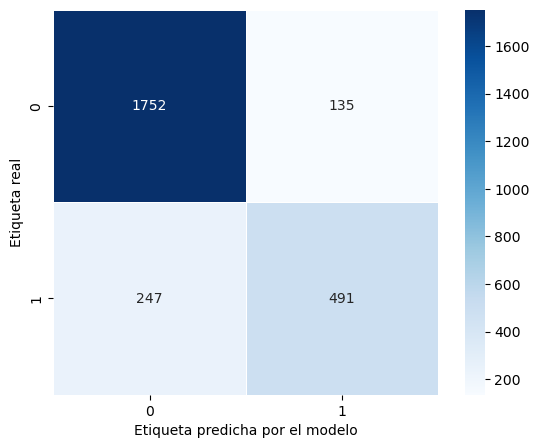

In [35]:
cm_svm = confusion_matrix(y_test, svm_predicts)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm_svm, linewidths=.5, annot=True, fmt='.0f', square = True,  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

plt.show()

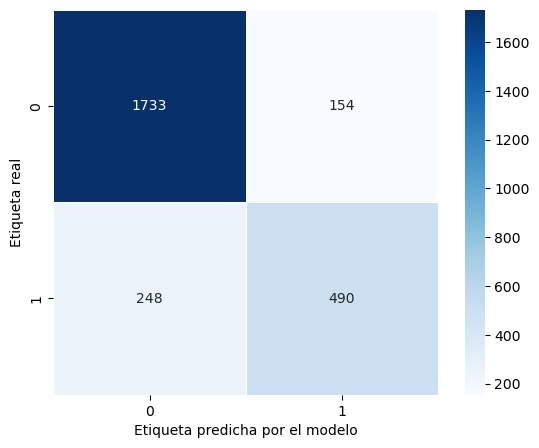

In [36]:
cm_knn = confusion_matrix(y_test, knn_predicts)
plt.figure(figsize=(7,5))

sns.heatmap(data=cm_knn, linewidths=.5, annot=True,  fmt='.0f', square = True,  cmap = 'Blues')

plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha por el modelo')

plt.show()

De nuevo, el modelo SVM es mejor, pero por muy poco. La conclusión es la misma, nos vamos a quedar con el modelo SVM para poder predecir si un empleado está en riesgo de dejar la empresa.